In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue
import skimage

In [19]:
img_link = r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch11\kepler.png"

In [20]:
img = plt.imread(img_link)
(height, width) = img.shape
print(height, width)

400 400


In [21]:
img = (img*255).astype(np.uint8)

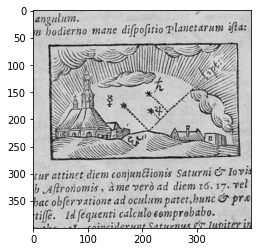

In [22]:
plt.imshow(img, cmap="gray")
plt.show()

In [23]:
def make_circular_region(u, v, r, height, width):
    coordinate = []
    x_coor = []
    y_coor = []
    for y in range(v-r, v+r+1):
        if y<0 or y>=height:
            continue
        for d in range(r+1):
            x = u-d
            if np.hypot(d,abs(v-y))>r:
                break
            if x>=0 and x<width:
                coordinate.append((x,y))
                x_coor.append(x)
                y_coor.append(y)
            if d>0:
                x_mirror = x+2*d
                if x_mirror>=0 and x_mirror<width:
                    coordinate.append((x_mirror,y))
                    x_coor.append(x_mirror)
                    y_coor.append(y)
    return coordinate, x_coor, y_coor

In [24]:
coordinate, x_coor, y_coor = make_circular_region(399, 399 ,300, height, width)

In [25]:
bin_img = np.zeros_like(img)
bin_img[x_coor, y_coor] = img[x_coor, y_coor]

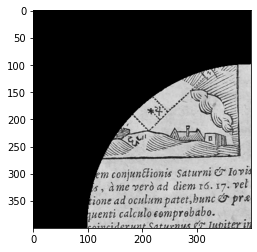

In [26]:
plt.imshow(bin_img, cmap="gray")
plt.show()

In [27]:
def get_local_mean_and_variance(img, u, v, r):
    (height, width) = img.shape
    coordinates, _, _ = make_circular_region(u, v, r, height, width)
    n = 0
    a = 0
    b = 0
    for point in coordinates:
        n += 1
        x_img = point[0]
        y_img = point[1]
        a += img[x_img, y_img]
        b += (img[x_img, y_img]**2)
    mean_incircle = a/n
    var_incircle = (1/n)*(b-(a**2)/n)
    return mean_incircle, var_incircle

In [28]:
def niblack_threshold(img, r, k, d, bg):
    cnt = 1
    (height, width) = img.shape
    threshold_matrix = np.zeros_like(img)
    for col in range(height):
        for row in range(width):
            print(cnt)
            cnt += 1
            mean_local, var_local = get_local_mean_and_variance(img, row, col, r)
            sd_local = np.sqrt(var_local)
            if bg == 0: # if background is dark
                threshold_matrix[row,col] = mean_local + (k*sd_local+d)
            elif bg == 1: # if background is white
                threshold_matrix[row,col] = mean_local - (k*sd_local+d)
    return threshold_matrix

In [29]:
def processed_img(img, threshold_matrix):
    (height, width) = img.shape
    new_img = np.zeros_like(img)
    for col in range(height):
        for row in range(width):
            new_img[row, col] = 255 if img[row,col]>threshold_matrix[row,col] else 0
    return new_img

In [ ]:
thresh_mat = niblack_threshold(img, r=15, k=0.3, d=5, bg=1)

In [31]:
new_img = processed_img(img, thresh_mat)

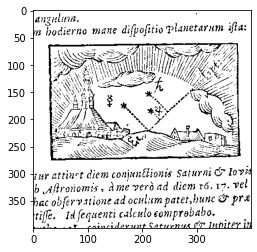

In [32]:
plt.imshow(new_img, cmap="gray")
plt.show()

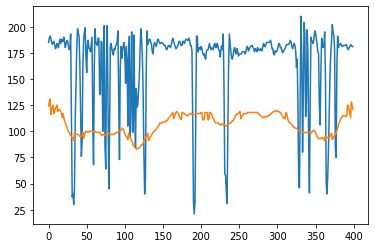

In [33]:
plt.plot(img[200,:])
plt.plot(thresh_mat[200,:])

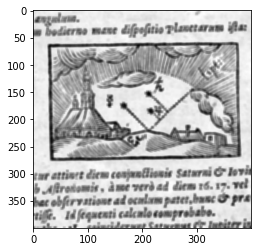

In [39]:
#using library
new_img = skimage.filters.threshold_niblack(img, window_size=5, k=0.5)
plt.imshow(new_img, cmap="gray")
plt.show()